# AdaBoost 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df['gender_int'] = df['sex'].map({'male':1,'female':0})

In [7]:
df['smoker_int'] = df['smoker'].map({'yes':1,'no':0})

In [8]:
df.pop('sex')

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object

In [9]:
df.pop('smoker')

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [10]:
df.pop('region')

0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1338, dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1338 non-null   int64  
 1   bmi         1338 non-null   float64
 2   children    1338 non-null   int64  
 3   charges     1338 non-null   float64
 4   gender_int  1338 non-null   int64  
 5   smoker_int  1338 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 62.8 KB


<Axes: xlabel='charges', ylabel='Count'>

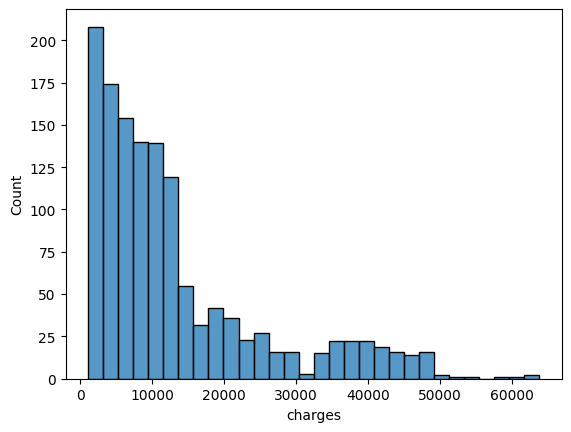

In [12]:
sns.histplot(data=df, x='charges')

In [13]:
df['charges_log'] = np.log(df['charges'])

<Axes: xlabel='charges_log', ylabel='Count'>

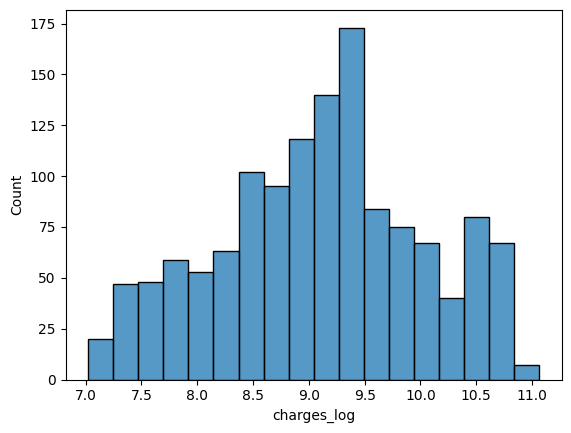

In [14]:
sns.histplot(data=df, x='charges_log')

In [15]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [16]:
X = df.drop('charges',axis=1)
y = df['charges']

In [17]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=500)

In [18]:
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [19]:
from sklearn.tree import DecisionTreeRegressor

In [20]:
from sklearn.ensemble import AdaBoostRegressor

In [34]:
abr = AdaBoostRegressor(DecisionTreeRegressor(max_depth=6,random_state=42),n_estimators=100,
                        random_state=500, learning_rate=0.1)

In [35]:
abr.fit(X_train, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=6, random_state=42),
                  learning_rate=0.1, n_estimators=100, random_state=500)

In [36]:
y_pred = abr.predict(X_val)

In [37]:
print('MAE:', metrics.mean_absolute_error(y_val, y_pred))
print('MSE:', metrics.mean_squared_error(y_val, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))

MAE: 60.60997745939721
MSE: 10009.376984274522
RMSE: 100.04687393554345


In [38]:
y_pred = abr.predict(X_test)

In [39]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 78.48203038755112
MSE: 22383.43749515248
RMSE: 149.61095379400695


# K-fold Cross Validation

In [40]:
from sklearn.metrics import make_scorer, mean_squared_error

In [41]:
from sklearn.model_selection import cross_val_score,KFold

In [42]:
def rmse_score(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [43]:
rmse_scorer = make_scorer(rmse_score, greater_is_better=False)

In [44]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [45]:
cv_scores = cross_val_score(abr, X, y, cv=kf, scoring=rmse_scorer)

In [46]:
print(f"Cross-validated RMSE scores: {cv_scores}")
print(f"Mean RMSE: {-np.mean(cv_scores)}")

Cross-validated RMSE scores: [-114.43285757  -98.66743222 -146.95197922 -232.72698479 -226.17532393]
Mean RMSE: 163.79091554581797
